<a href="https://colab.research.google.com/github/rheycachika/UAS_PWL_15199/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
df.columns = [
    'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
    'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
    'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
    'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
    'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'
]

df.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
import numpy as np
df.replace("?", np.nan, inplace=True)

In [14]:
df.drop_duplicates(inplace=True)


In [15]:
nunique = df.nunique()
const_columns = nunique[nunique == 1].index
df.drop(columns=const_columns, inplace=True)


In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns.tolist())


Kolom kategorikal: ['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']


In [17]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    df[col] = df[col].astype(str)  # pastikan string
    df[col] = LabelEncoder().fit_transform(df[col])


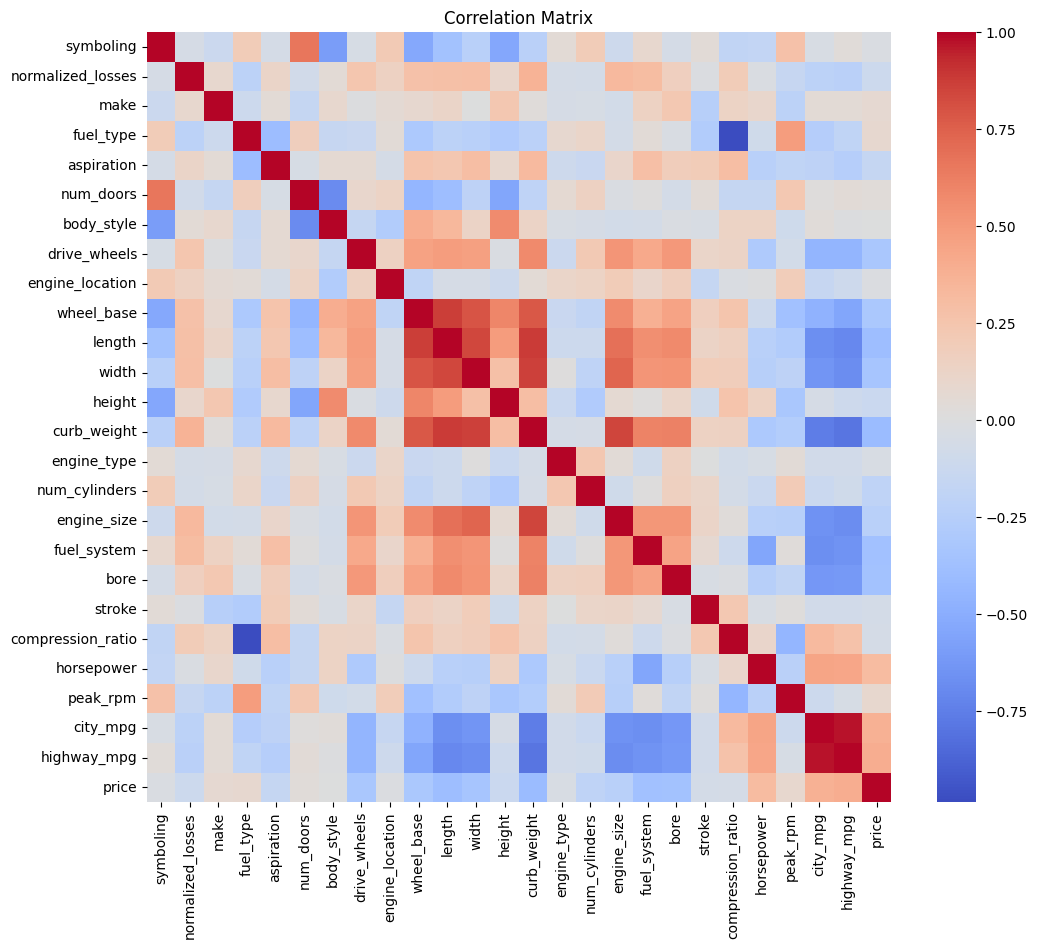

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.apply(pd.to_numeric, errors='coerce')  # semua jadi numerik

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop baris kosong
df.dropna(inplace=True)

# X dan y
X = df.drop('price', axis=1)
y = df['price'].astype(float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 2967.2720501922427
RMSE: 54.4726725082609
R² Score: 0.11588997503761034


In [20]:
intercept = model.intercept_
coefficients = model.coef_

formula = f"price = {intercept:.2f}"
for col, coef in zip(X.columns, coefficients):
    formula += f" + ({coef:.2f} * {col})"

print("Rumus Linear Regression:\n", formula)


Rumus Linear Regression:
 price = 750.95 + (1.96 * symboling) + (-0.02 * normalized_losses) + (2.61 * make) + (-163.96 * fuel_type) + (-3.26 * aspiration) + (-3.47 * num_doors) + (15.89 * body_style) + (0.86 * drive_wheels) + (-31.77 * engine_location) + (1.39 * wheel_base) + (-1.87 * length) + (-1.56 * width) + (-2.30 * height) + (-0.05 * curb_weight) + (-1.35 * engine_type) + (-12.12 * num_cylinders) + (0.83 * engine_size) + (-5.76 * fuel_system) + (-0.44 * bore) + (-0.35 * stroke) + (-11.00 * compression_ratio) + (0.07 * horsepower) + (2.28 * peak_rpm) + (-4.84 * city_mpg) + (4.09 * highway_mpg)
